<a href="https://colab.research.google.com/github/Eyad-dev/ROS2_Turtlesim_project/blob/main/UK_Train_Ridership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# Project: UK Train Ridership
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading the dataset
df = pd.read_csv("railway.csv")

In [49]:
#Displaying the first 5 rows to observe the dataset
df.head()

Transaction ID Date of Purchase Time of Purchase Purchase Type  \
0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   

  Payment Method Railcard Ticket Class Ticket Type  Price  \
0    Contactless    Adult     Standard     Advance     43   
1    Credit Card    Adult     Standard     Advance     23   
2    Credit Card      NaN     Standard     Advance      3   
3    Credit Card      NaN     Standard     Advance     13   
4    Contactless      NaN     Standard     Advance     76   

       Departure Station    Arrival Destination Date of Journey  \
0      London Paddington  Liverpool Lime Street      2024-01-01   
1     London Kings Cross                   York      2024-01-01   
2  Liverpool Lime Street  Manchester Piccadilly      2024-01-02   
3      London Paddington                Reading      2024-01-01   
4  Liverpool Lime Street          London Euston      2024-01-01   

  Departure Time Arrival Time Actual Arrival Time Journey Status  \
0       11:00:00     13:30:00            13:30:00        On Time   
1       09:45:00     11:35:00            11:40:00        Delayed   
2       18:15:00     18:45:00            18:45:00        On Time   
3       21:30:00     22:30:00            22:30:00        On Time   
4       16:45:00     19:00:00            19:00:00        On Time   

  Reason for Delay Refund Request  
0              NaN             No  
1   Signal Failure             No  
2              NaN             No  
3              NaN             No  
4              NaN             No

In [50]:
#Displaying the shape of the dataset [rows, columns]
print("Shape",df.shape)
print("----------------------------------------------------------------------------")
#Displaying each column individually
print(df.columns.tolist())
print("----------------------------------------------------------------------------")
#Observing the datatypes of each column
#We get to see that "Price" column is the only different column being an int64 data type
print(df.dtypes)

Shape (31653, 18)
----------------------------------------------------------------------------
['Transaction ID', 'Date of Purchase', 'Time of Purchase', 'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class', 'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination', 'Date of Journey', 'Departure Time', 'Arrival Time', 'Actual Arrival Time', 'Journey Status', 'Reason for Delay', 'Refund Request']
----------------------------------------------------------------------------
Transaction ID         object
Date of Purchase       object
Time of Purchase       object
Purchase Type          object
Payment Method         object
Railcard               object
Ticket Class           object
Ticket Type            object
Price                   int64
Departure Station      object
Arrival Destination    object
Date of Journey        object
Departure Time         object
Arrival Time           object
Actual Arrival Time    object
Journey Status         object
Reason for Delay       obj

In [51]:
#Description of the dataset
display(df.describe())


Price
count  31653.000000
mean      23.439200
std       29.997628
min        1.000000
25%        5.000000
50%       11.000000
75%       35.000000
max      267.000000

In [52]:
#Checking for missing values
#There is shown to be 3 columns with a bunch of missing data *especially reason for delay*
#However That is how actually a dataset would be in this case
#Railcard can possibly have missing data because its not guranteed that every passenger is
#subscribed to the railcard system
#Some Actual arrival time cells are missing due to *Cancelled* trips so there was no
#Arrival in the first place
#Some cells in "Reason for delay" are empty because there were no delays during these cases
print(df.isnull().sum())
print("----------------------------------------------------------------------------")

#Checking for Duplicates
print("Duplicated values: ",df.duplicated().sum())

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64
----------------------------------------------------------------------------
Duplicated values:  0


In [53]:
#Filling missing values
df['Railcard']= df['Railcard'].fillna("No Railcard")
df['Reason for Delay'] = df['Reason for Delay'].fillna("No Reason")
df['Actual Arrival Time'] = df['Actual Arrival Time'].fillna("No Arrival")

#Check if missing values are filled
df[df['Railcard'].isna() & df['Reason for Delay'].isna() & df['Actual Arrival Time']]
#As seen here There are no more missing values for the 3 these columns

Empty DataFrame
Columns: [Transaction ID, Date of Purchase, Time of Purchase, Purchase Type, Payment Method, Railcard, Ticket Class, Ticket Type, Price, Departure Station, Arrival Destination, Date of Journey, Departure Time, Arrival Time, Actual Arrival Time, Journey Status, Reason for Delay, Refund Request]
Index: []

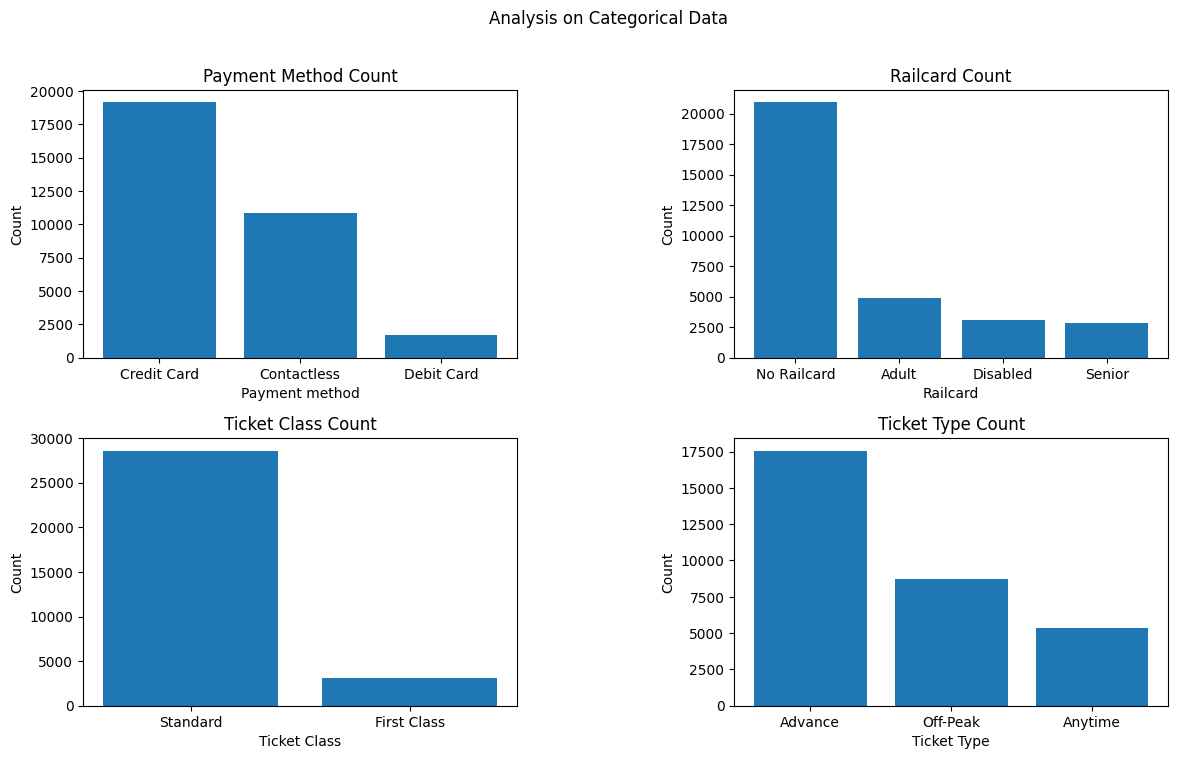

In [66]:
fig, axs = plt.subplots(2,2, figsize=(14,8))
plt.subplots_adjust(
    hspace = 0.3,
    wspace = 0.5
)
fig.suptitle("Analysis on Categorical Data")
paymentCount= df['Payment Method'].value_counts()
axs[0, 0].bar(paymentCount.index, paymentCount.values)
axs[0, 0].set(xlabel = 'Payment method', ylabel = 'Count', title = 'Payment Method Count')
railcardCount = df['Railcard'].value_counts()
axs[0, 1].bar(railcardCount.index, railcardCount.values)
axs[0, 1].set(xlabel = 'Railcard', ylabel = 'Count', title = 'Railcard Count')
ticketClassCount = df['Ticket Class'].value_counts()
axs[1, 0].bar(ticketClassCount.index, ticketClassCount.values)
axs[1, 0].set(xlabel = 'Ticket Class', ylabel = 'Count', title='Ticket Class Count')
ticketTypeCount = df['Ticket Type'].value_counts()
axs[1, 1].bar(ticketTypeCount.index, ticketTypeCount.values)
axs[1, 1].set(xlabel = 'Ticket Type', ylabel = 'Count', title = 'Ticket Type Count')
plt.show()